In [1]:
import numpy as np
from gensim.models.keyedvectors import KeyedVectors
import networkx as nx
from scipy.sparse import lil_matrix
import matplotlib.pyplot as plt
import itertools
import sys

sys.path.append('..')
from utils import*

In [2]:
model_path = '/home/mitya/PycharmProjects/nlp_graph/model.bin'
model = KeyedVectors.load_word2vec_format(model_path, binary=True)

In [3]:
text = "Есть рядом две земли: Швейцария и Италия. Между этими двумя землями есть горы Альпы. Горы эти так высоки, что снег на них никогда не тает. По дороге из Швейцарии в Италию надо переходить через эти горы. Дорога идёт через гору Сан-Готард. На самом верху этой горы, на дороге, построен монастырь. И в этом монастыре живут монахи. Монахи эти молятся Богу и пускают к себе дорожных людей на отдых и на ночлег. На Сан-Готарде всегда бывает пасмурно; летом туман, и ничего не видно. А зимой бывают такие метели, что на пять аршин заносит снегом. И проезжие и прохожие часто замерзают в эти метели. У монахов есть собаки. И собаки эти приучены отыскивать в снегу людей.Один раз по дороге в Швейцарию шла женщина с ребёночком. Началась метель; женщина сбилась с дороги, села в снегу и застыла. Монахи вышли с собаками и нашли женщину с ребёночком. Монахи отогрели ребёночка и выкормили. А женщину они принесли уже мёртвую и похоронили у себя в монастыре."

In [4]:
text_tagged = pymorphy_tagger(clean_numbers(text))
text_tagged = text_tagged.split()

In [5]:
text_tagged_rand = generate_random(text_tagged)

In [6]:
text_mat = adjacency_mat(text_tagged)
text_mat_rand = adjacency_mat(text_tagged_rand)

In [7]:
graph = make_graph(text_mat, text_tagged, 0.1)
graph_rand = make_graph(text_mat_rand, text_tagged_rand, 0.1)

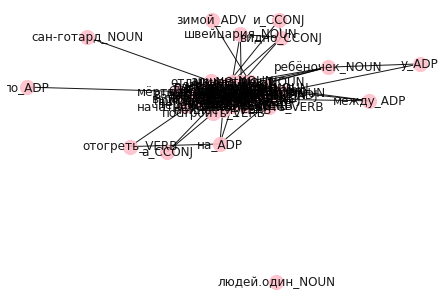

In [8]:
draw_graph(graph, 200, 0.9, show_weights=False)

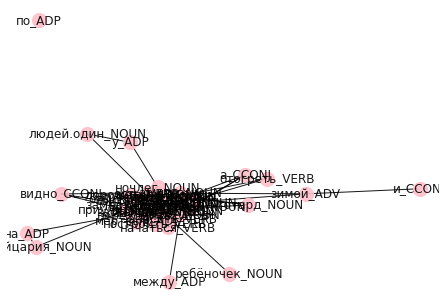

In [9]:
draw_graph(graph_rand, 200, 0.9, show_weights=False)

#### text average clustering coefficient (filtration by metric)

In [10]:
average_clustering = metric_filtration(text_mat, text_tagged)

average_clustering_rand = metric_filtration(text_mat_rand, text_tagged_rand)

In [11]:
average_clustering

{'threshold_0.1': 0.7619721260474926,
 'threshold_0.2': 0.5836909675198114,
 'threshold_0.30000000000000004': 0.3032516262265539,
 'threshold_0.4': 0.13797814207650272,
 'threshold_0.5': 0.06284153005464481,
 'threshold_0.6': 0.0,
 'threshold_0.7000000000000001': 0.0,
 'threshold_0.8': 0.0}

In [12]:
average_clustering_rand

{'threshold_0.1': 0.731309448196338,
 'threshold_0.2': 0.550303471857502,
 'threshold_0.30000000000000004': 0.2747619047619048,
 'threshold_0.4': 0.16962962962962966,
 'threshold_0.5': 0.05185185185185184,
 'threshold_0.6': 0.0,
 'threshold_0.7000000000000001': 0.0,
 'threshold_0.8': 0.0}

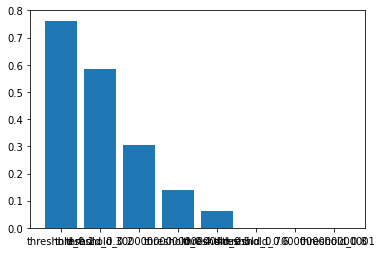

In [13]:
draw_filtration_metric(average_clustering)

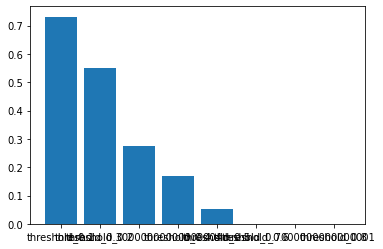

In [14]:
draw_filtration_metric(average_clustering_rand)

#### compute cliques of graph and select n-dimensional (check why different results on different runs)

In [15]:
C = nx.find_cliques(graph)

C = [tuple(sorted(c)) for c in C]

In [16]:
C_rand = nx.find_cliques(graph_rand)

C_rand = [tuple(sorted(c)) for c in C_rand]

In [17]:
select_triangles(C, 3)

[('а_CCONJ', 'молиться_VERB', 'построить_VERB'),
 ('аршин_NOUN', 'видно_CCONJ', 'снег_NOUN'),
 ('альпы_NOUN', 'между_ADP', 'монах_NOUN'),
 ('бывать_VERB', 'между_ADP', 'монах_NOUN'),
 ('на_ADP', 'отыскивать_VERB', 'принести_VERB'),
 ('аршин_NOUN', 'село_NOUN', 'швейцария_NOUN'),
 ('аршин_NOUN', 'видно_CCONJ', 'швейцария_NOUN')]

In [18]:
len(select_triangles(C, 3))

7

In [19]:
select_triangles(C_rand, 3)

[('аршин_NOUN', 'зимой_ADV', 'туман_NOUN'),
 ('верх_NOUN', 'дорога_NOUN', 'отогреть_VERB')]

In [20]:
len(select_triangles(C_rand, 3))

2